# **Library Book Recommendation System**
---
Authors: [Monicah Iwagit](https://github.com/Okodoimonicah), [Bradley Azegele](https://github.com/Azegele), [Emmanuel Kipkorir](), [Belinda Nyamai](), [Femi Kamau](https://github.com/ctrl-Karugu), and [Dennis Kimiri]()

## 1. Business Understanding

### 1.1 Problem Statement
>The tremendous growth and usage of information has led to information overloading where users find it difficult to locate the right information at a specified time. Although there are previous studies conducted on library recommender systems, the datasets used were small compared to the dataset we intend to use hence minimal area coverage. Recommending the right library books is a challenge due to the variety of genres available and the huge collection of books provided. A user finds it difficult to select the most appropriate book that will suit their academic needs, this process consumes a lot of time that the user would have used to sharpen on their desired skills. Additionally, many books in the library are rarely utilized which results in a waste of library resources. Having a personalized recommendation system seeks to predict the preference based on the user’s interest, behavior and information. The application of recommender systems in the university library solves the problem of difficulty in choosing books and improves utilization rate of library resources. 

## 2. Data Understanding
> The goal of the Data Understanding phase is to provide a solid foundation for the subsequent steps, including data preparation, exploratory data analysis, model development, and evaluation.

#### Load Libraries

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
import warnings

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### 2.1 Collect Initial Data
> The goal of this section is to acquire the necessary data and load it into the notebook.

> The data used in this project was sourced from 2 different sources:
>   1. The first was source was from Cai-Nicolas Ziegler in a 4-week crawl (August-September [2004]) in the University of Freiburg, Germany. This can be found [here](http://www2.informatik.uni-freiburg.de/~cziegler/BX/). The data obtained are 3 datasets with information on [users](./data/BX-Users.csv), [ratings](./data/BX-Book-Ratings.csv) and [books](./data/BX-Books.csv) from a library.
>
>   2. The second set of data was sourced from the [Google Books API](https://developers.google.com/books). This data was obtained by using ISBNs in the books dataset from the first source. The script used to extract the data can be found [here](./make_dataset.py). This data was then stored in csv format and can be found [here](./data/books.csv).

#### Load Data

In [3]:
# (Source 1)
ratings = pd.read_csv("data/BX-Book-Ratings.csv", sep=";", on_bad_lines='skip', encoding="latin-1")
books = pd.read_csv("data/BX-Books.csv", sep=";", on_bad_lines='skip', encoding="latin-1")
users = pd.read_csv("data/BX-Users.csv", sep=";", on_bad_lines='skip', encoding="latin-1")

# (Source 2)
books_extra = pd.read_csv("data/books.csv", encoding="latin-1")

### 2.2 Describe Data
> The goal of this section is to examine the data and document its surface properties.

In [4]:
# Define class to describe the data 
class DescribeData():
    """This class is used to describe the data in a DataFrame."""
    
    def __init__(self, df) -> None:
        
        # Get the DataFrame
        self.df = df
        
        # Get the datatypes of the columns in the DataFrame
        self.datatypes = df.dtypes
         
        # Get the shape of the DataFrame
        self.shape = f"The shape of the DataFrame is {df.shape}\n\nRecords: {df.shape[0]}\nColumns: {df.shape[1]}"
        
        # Get the number of missing values in each column
        self.missing = f"There are a total of {df.isnull().sum().values.sum()} missing values in the DataFrame.\n\n{df.isnull().sum()}"
        
        # Get the number of duplicate rows
        self.duplicates = f"There are {df.duplicated().sum()} duplicated records in the DataFrame."

#### 2.2.1 `ratings`

In [5]:
# Create an instance of the 'DescribeData' class for the 'ratings' DataFrame
rt = DescribeData(ratings)

In [6]:
# Preview the 'ratings' DataFrame
rt.df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
# Inspect the information about the DataFrame
rt.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [8]:
# Inspect the shape of the DataFrame
print(rt.shape)

The shape of the DataFrame is (1149780, 3)

Records: 1149780
Columns: 3


In [9]:
# Inspect the datatypes of the columns in the DataFrame
print(rt.datatypes)

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object


In [10]:
# Inspect the summary statistics of the DataFrame
rt.df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [11]:
# Inspect the number of missing values in each column
print(rt.missing)

There are a total of 0 missing values in the DataFrame.

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [12]:
# Inspect the duplicates in the DataFrame
print(rt.duplicates)

There are 0 duplicated records in the DataFrame.


[**Ratings Dataset**](./data/BX-Book-Ratings.csv)

>* Spans **3** columns and **1,149,780** rows.

>* Contains **2** unique datatypes: 
>    * **int64**
>    * **object**

>* Has no missing values

>* Has no duplicates

#### 2.2.2 `books` 

In [13]:
# Instantiate the 'DescribeData' class for the 'books' DataFrame
bk = DescribeData(books)

In [14]:
# Preview the 'books' DataFrame
bk.df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [15]:
# Inspect the information about the DataFrame
bk.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [16]:
# Inspect the shape of the DataFrame
print(bk.shape)

The shape of the DataFrame is (271360, 8)

Records: 271360
Columns: 8


In [17]:
# Inspect the datatypes of the columns in the DataFrame
print(bk.datatypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


In [18]:
# Inspect the missing values in the DataFrame
print(bk.missing)

There are a total of 6 missing values in the DataFrame.

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [19]:
# Inspect the duplicates in the DataFrame
print(bk.duplicates)

There are 0 duplicated records in the DataFrame.


[**Books Dataset**](./data/BX-Books.csv)

>* Spans **8** columns and **271,359** rows.

>* Contains 1 unique datatype: 
>   * **object**

>* Has **6** missing values:
>   * Book-Author: **1** 
>   * Publisher: **2**
>   * Image-URL-L: **3**

>* Has no duplicates

#### 2.2.3 `users` 

In [20]:
# Instantiate the 'DescribeData' class for the 'users' DataFrame
ur = DescribeData(users)

In [21]:
# Preview the 'users' DataFrame
ur.df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [22]:
# Inspect the information about the DataFrame
ur.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [23]:
# Inspect the shape of the DataFrame
print(ur.shape)

The shape of the DataFrame is (278858, 3)

Records: 278858
Columns: 3


In [24]:
# Inspect the datatypes of the columns in the DataFrame
print(ur.datatypes)

User-ID       int64
Location     object
Age         float64
dtype: object


In [25]:
# Inspect the summary statistics of the DataFrame
ur.df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [26]:
# Inspect the missing values in the DataFrame
print(ur.missing)

There are a total of 110762 missing values in the DataFrame.

User-ID          0
Location         0
Age         110762
dtype: int64


In [27]:
# Inspect the duplicates in the DataFrame
print(ur.duplicates)

There are 0 duplicated records in the DataFrame.


[**Users Dataset**](./data/BX-Users.csv)

>* Spans **3** columns and **278,857** rows.

>* Contains **3** unique datatypes:
>   * **int64**
>   * **float64**
>   * **object**

>* Has **110762** missing values:
>   * Age: **110,762**

>* Has no duplicates

#### 2.2.4 `books_extra`

In [28]:
# Instantiate the 'DescribeData' class for the 'books_extra' DataFrame
bk_extra = DescribeData(books_extra)

In [29]:
# Preview the 'books_extra' DataFrame
bk_extra.df.head()

,authors,published_date,description,isbn_10,isbn_13,page_count,categories,maturity_rating,language,join_isbn_10
0,"['Mark P. O. Morford', 'Robert J. Lenardon']",2003,"Provides an introduction to classical myths placing the addressed topics within their historical context, discussion of archaeological evidence as support for mythical events, and how these themes have been portrayed in literature, art, music, and film.",0195153448,9780195153446.0,808.0,['Social Science'],NOT_MATURE,en,0195153448
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0002005018
2,"[""Carlo D'Este""]",1991,"Here, for the first time in paperback, is an outstanding military history that offers a dramatic new perspective on the Allied campaign that began with the invasion of the D-Day beaches of Normandy. Nationa advertising in Military History.",IND:30000026059836,NaN,582.0,['1940-1949'],NOT_MATURE,en,0060973129
3,['Gina Bari Kolata'],1999,"Describes the great flu epidemic of 1918, an outbreak that killed some forty million people worldwide, and discusses the efforts of scientists and public health officials to understand and prevent another lethal pandemic",9780374157067,374157065.0,367.0,['Medical'],NOT_MATURE,en,0374157065
4,['E. J. W. Barber'],1999,"A look at the incredibly well-preserved ancient mummies found in Western China describes their clothing and appearance, attempts to reconstruct their culture, and speculates about how Caucasians could have found their way to the feet of the Himalayan mountains.",0393045218,9780393045215.0,240.0,['Design'],NOT_MATURE,en,0393045218


In [30]:
# Inspect the information about the DataFrame
bk_extra.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266401 entries, 0 to 266400
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   authors          200900 non-null  object 
 1   published_date   202728 non-null  object 
 2   description      171784 non-null  object 
 3   isbn_10          202788 non-null  object 
 4   isbn_13          171364 non-null  object 
 5   page_count       201597 non-null  float64
 6   categories       189620 non-null  object 
 7   maturity_rating  202848 non-null  object 
 8   language         202848 non-null  object 
 9   join_isbn_10     266400 non-null  object 
dtypes: float64(1), object(9)
memory usage: 20.3+ MB


In [31]:
# Inspect the shape of the DataFrame
print(bk_extra.shape)

The shape of the DataFrame is (266401, 10)

Records: 266401
Columns: 10


In [32]:
# Inspect the datatypes of the columns in the DataFrame
print(bk_extra.datatypes)

authors             object
published_date      object
description         object
isbn_10             object
isbn_13             object
page_count         float64
categories          object
maturity_rating     object
language            object
join_isbn_10        object
dtype: object


In [33]:
# Inspect the summary statistics of the DataFrame
bk_extra.df.describe()

,page_count
count,201597.000000
mean,279.266581
std,179.229782
min,0.000000
25%,176.000000
50%,260.000000
75%,356.000000
max,3596.000000


In [34]:
# Inspect the missing values in the DataFrame
print(bk_extra.missing)

There are a total of 651133 missing values in the DataFrame.

authors            65501
published_date     63673
description        94617
isbn_10            63613
isbn_13            95037
page_count         64804
categories         76781
maturity_rating    63553
language           63553
join_isbn_10           1
dtype: int64


In [35]:
# Inspect the duplicates in the DataFrame
print(bk_extra.duplicates)

There are 0 duplicated records in the DataFrame.


[**Books (Extra) Dataset**](./data/books.csv)

>* Spans **10** columns and **()** rows.

>* Contains **2** unique datatypes:
>   * **float64**
>   * **object**

>* Has **()** missing values:

>* Has no duplicates

## 3. Data Preparation
> The goal of the Data Preparation phase, which is often referred to as “data munging”, prepares the final data set(s) for modeling.

## Users Dataset

In [36]:
#splitting a string into a list
list_ = users.Location.str.split(', ')

#empty lists to add values  
city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0
#generating a for loop to add values to the empty lists
for i in range(0,len(list_)):
    #removing invalid entries in city
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        #removing invalid entries in state
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            #removing invalid entries in country
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())
        
#dropping the location column from users             
users = users.drop('Location',axis=1)

#handling cases where city/state from the lists is already given
temp = []
for ent in city:
    c = ent.split('/')            
    temp.append(c[0])
    
#creating a dataframe for city, state and country
df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

#adding the new dataframes to the original users dataframe 
users = pd.concat([users, df_city], axis=1)
users = pd.concat([users, df_state], axis=1)
users = pd.concat([users, df_country], axis=1)

#printing the number of countries that do not have values 
print(count_no_country)

#printing the states which didnt have any values
print(count_no_state)     

4659
16044


In [37]:
## Drop duplicate rows
users.drop_duplicates(keep='last', inplace=True)
users.reset_index(drop=True, inplace=True)

In [38]:
#confirming that the new dataframes have been added to users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  278858 non-null  int64  
 1   Age      168096 non-null  float64
 2   City     278858 non-null  object 
 3   State    278858 non-null  object 
 4   Country  278858 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.6+ MB


In [39]:
users.head()

,User-ID,Age,City,State,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


### Dealing with missing values in the Age column

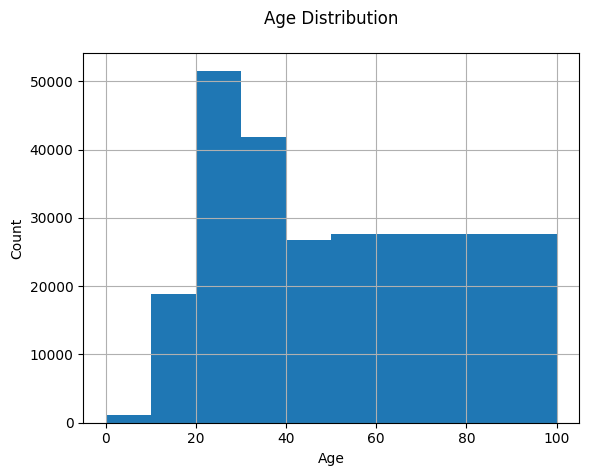

In [40]:
#checking the Age distribution
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [41]:
#users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
#plt.title('Age Distribution\n')
#plt.xlabel('Age')
#plt.ylabel('Count')
#plt.show()

The most active users are in the age bracket between 20 to 30 years.

Text(0.5, 1.0, 'Outliers present in the Age column')

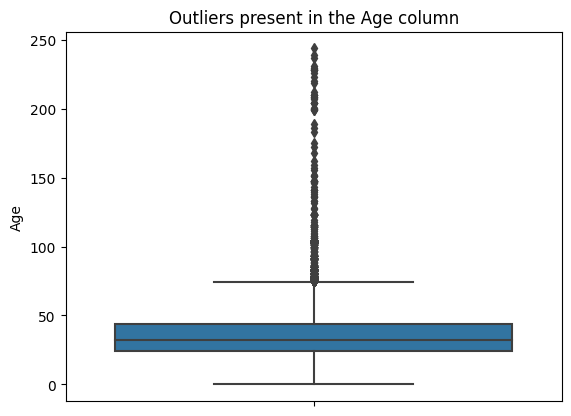

In [42]:
#checking for outliers in the age column using a boxplot
sns.boxplot(y='Age', data=users)
plt.title('Outliers present in the Age column')

The boxplot shows that age has positive skewness(Right Tail) hence median can be used to fill null values

In [43]:
#checking all values present in the Age column
print(sorted(list(users['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Text(0.5, 1.0, 'Age Distribution Plot')

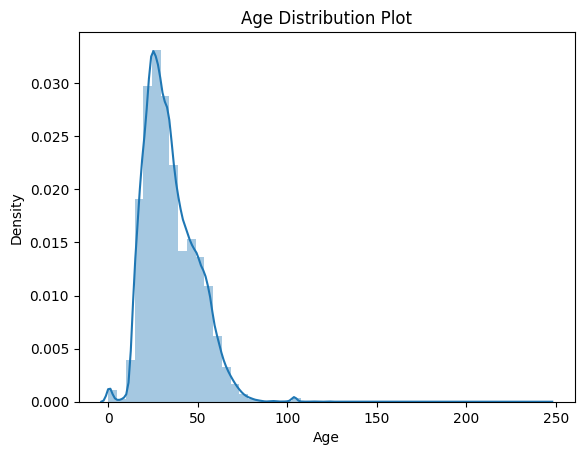

In [44]:
#plotting a distribution plot to discover the relevant age bracket 
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

Evidently, ages below 10 and above 80 do not make sense for book rating

In [45]:
# grouping ages below 100 and above 10
required = users[users['Age'] <= 80]
required = required[required['Age'] >= 10]
#calculating the median for the required ages
median = round(required['Age'].median())   
median

32

In [46]:
#outliers with age grater than 80 are substituted with median 
users.loc[users['Age'] > 80, 'Age'] = median

#outliers with age less than 10 years are substitued with median
users.loc[users['Age'] < 10, 'Age'] = median 

#filling null values with median
users['Age'] = users['Age'].fillna(median)

#changing the datatype to an integer
users['Age'] = users['Age'].astype(int)      

In [47]:
#confirming that the missing values have been dealt with
users.isna().sum()

User-ID    0
Age        0
City       0
State      0
Country    0
dtype: int64

### Books Dataset

In [48]:
#function for plotting a countplot
def count_plot (column, dataset, heading):
    """Visualize the countplots of various dataframes with seaborn barplot
    
    Args: 
        data: dataframe of various columns and their count returned from count_plot function
        
    Returns: 
        countplot: countplot of columns and their count
    """
    plt.figure(figsize=(15,8));
    sns.countplot(y=column, data=dataset, order=pd.value_counts(dataset[column]).iloc[0:15].index);
    plt.title(heading);

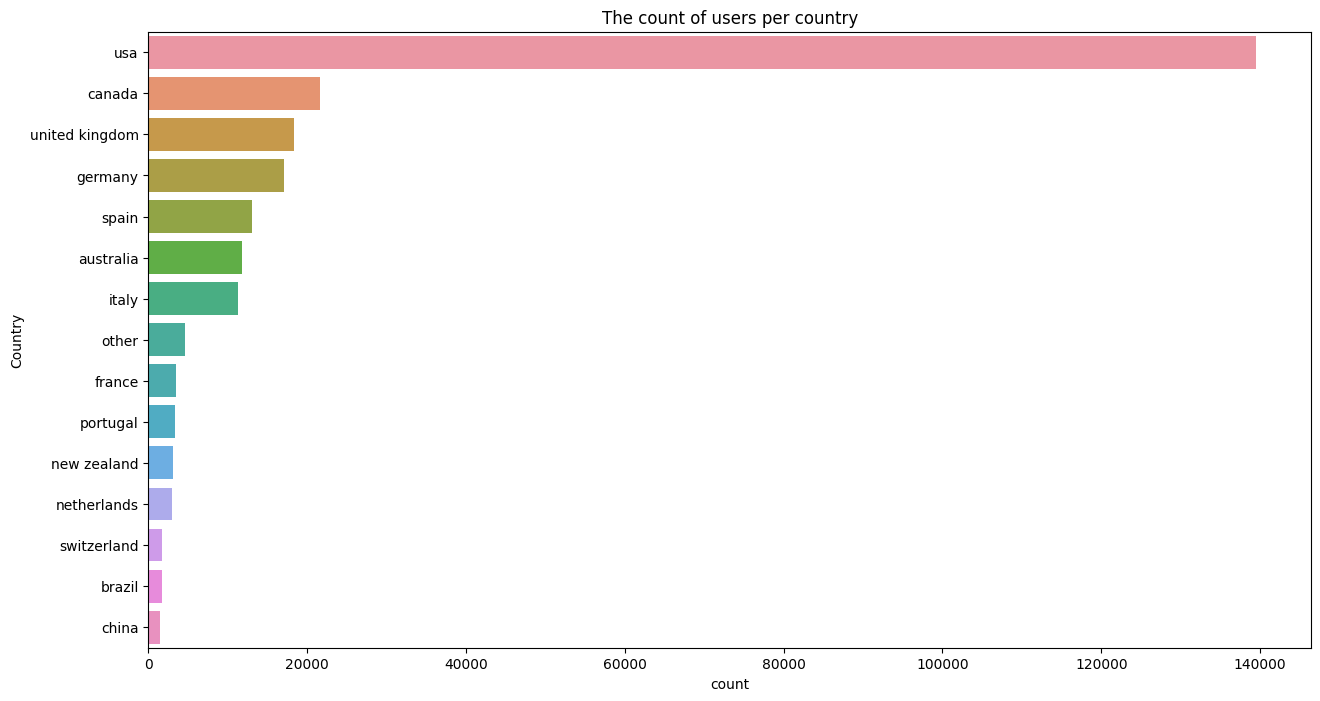

In [49]:
count_plot('Country', users, 'The count of users per country')

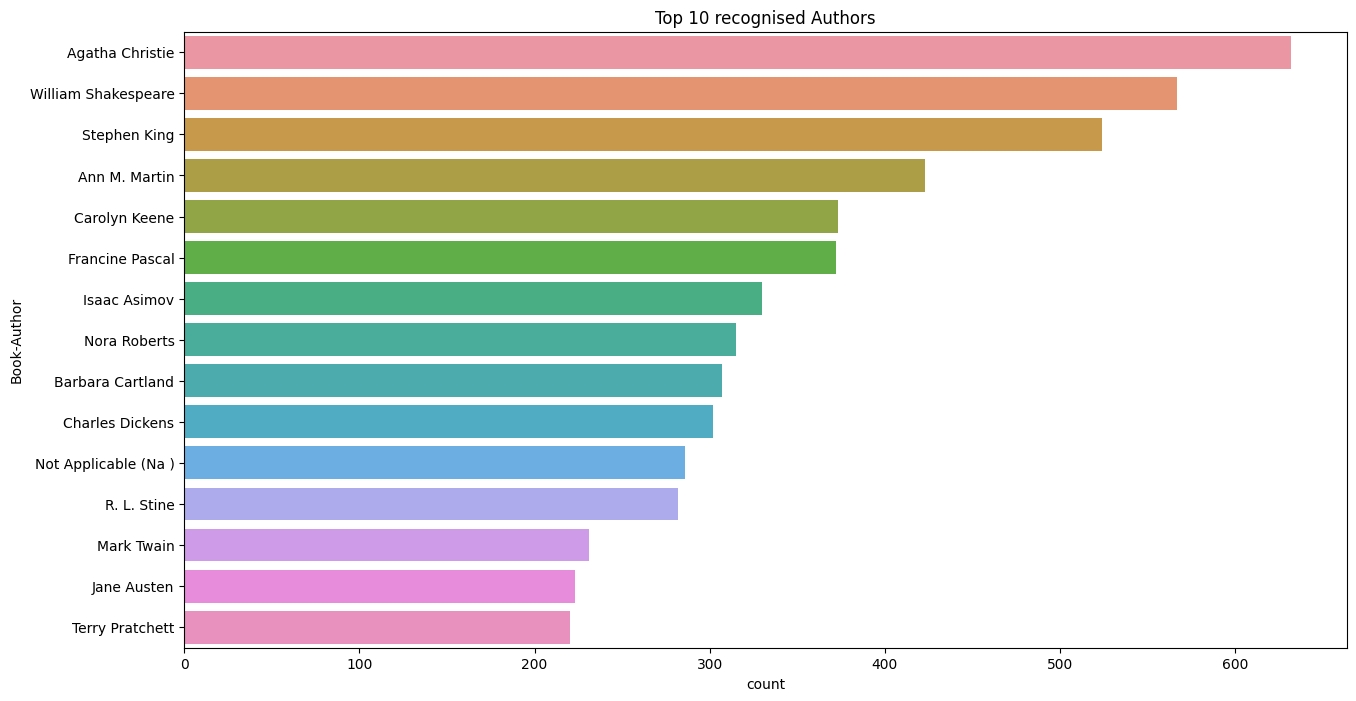

In [50]:
count_plot('Book-Author', books, 'Top 10 recognised Authors')

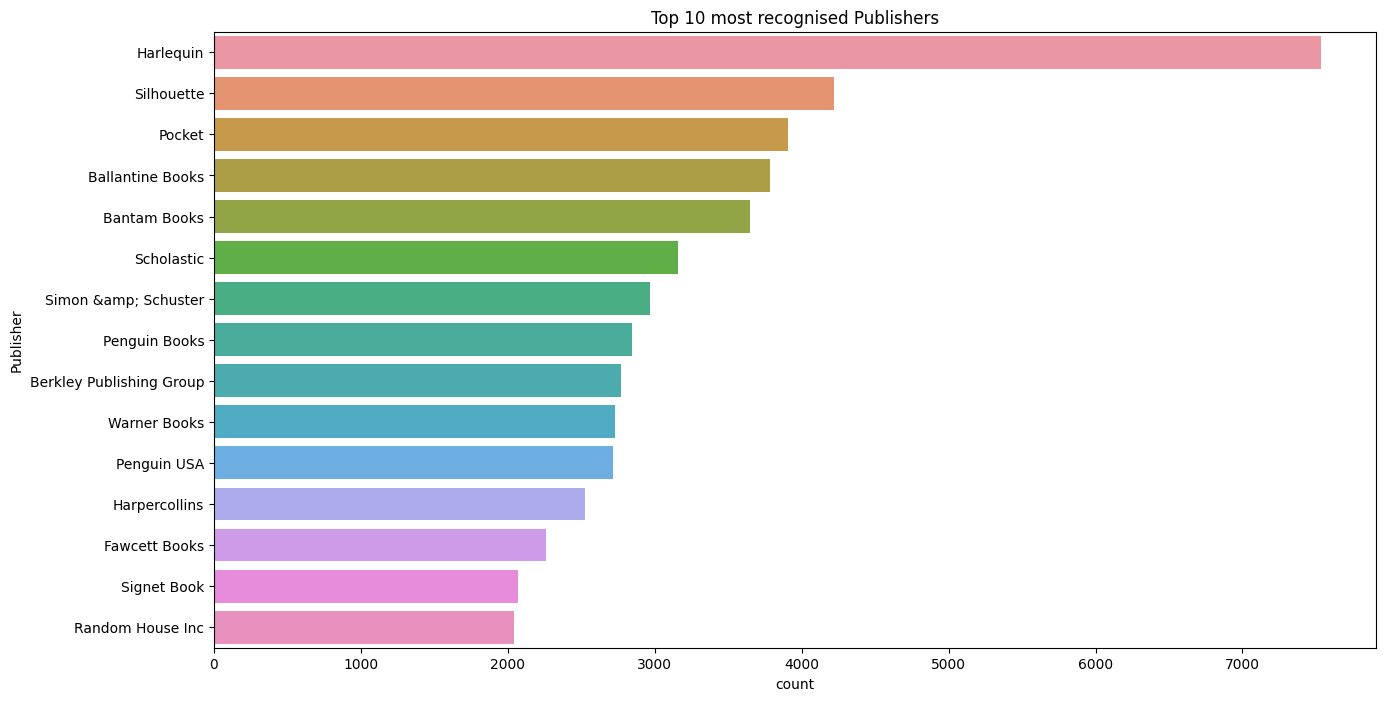

In [51]:
count_plot('Publisher', books, 'Top 10 most recognised Publishers')

In [52]:
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'James Buckley'

books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'Year-Of-Publication'] = '2003'
books.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [53]:
## Converting year of publication to integers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [54]:
## Replacing Invalid years with max year
#count = Counter(books['Year-Of-Publication'])
#[k for k, v in count.items() if v == max(count.values())]

In [55]:
print(sorted(list(books['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [56]:
#checking for the years of publication that are above 2006 and 0 and replacing with null values
books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing null values with median value of Year-Of-Publication
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()), inplace=True)

#alternatively replacing with maximum year
books.loc[books['Year-Of-Publication'] > 2021, 'Year-Of-Publication'] = 2002
books.loc[books['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

In [57]:
## Uppercasing all alphabets in ISBN
books['ISBN'] = books['ISBN'].str.upper()

### Ratings Dataset

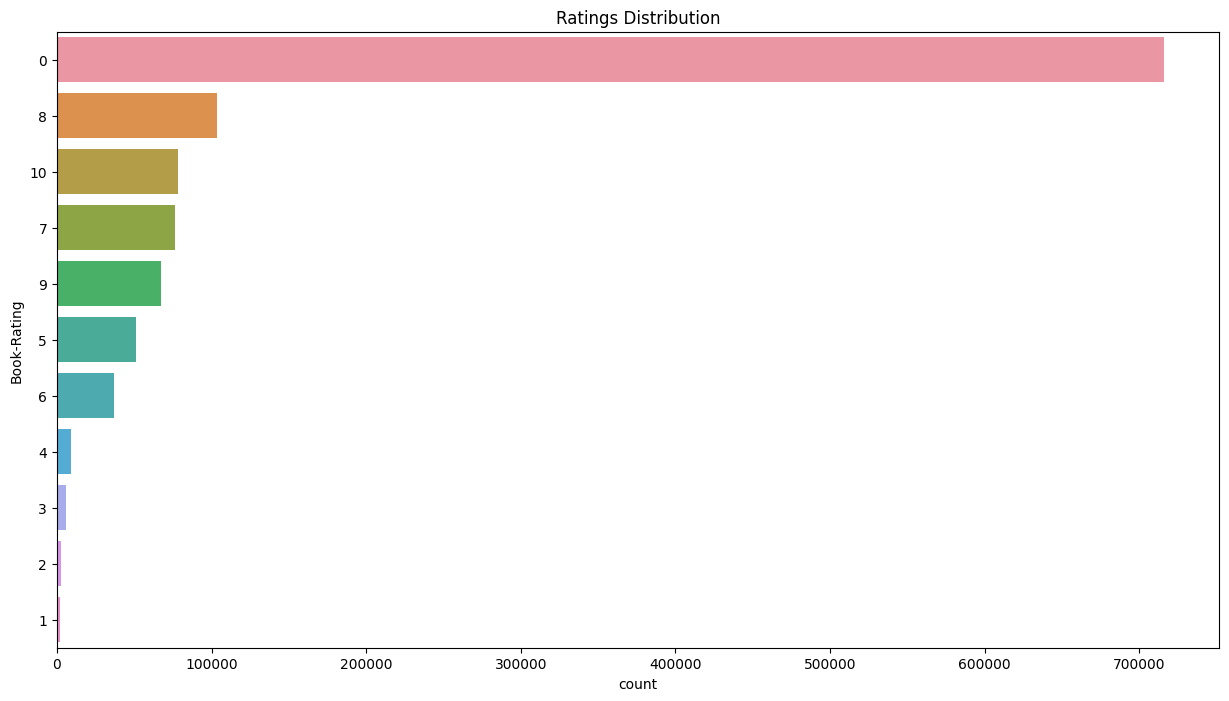

In [58]:
#checking the distribution of ratings
count_plot('Book-Rating', ratings, 'Ratings Distribution')

The ratings are unevenly distributed since majority of the ratings are 0. The ratings are either explicit, expressed on a scale of 1-10 with higher values denoting higher appreciation, or implicit, expressed by 0. Hence the need to segragate implicit and explict ratings datasets

In [59]:
#segregating implicit and explict ratings datasets
ratings_explicit = ratings[ratings['Book-Rating'] != 0]
ratings_implicit = ratings[ratings['Book-Rating'] == 0]

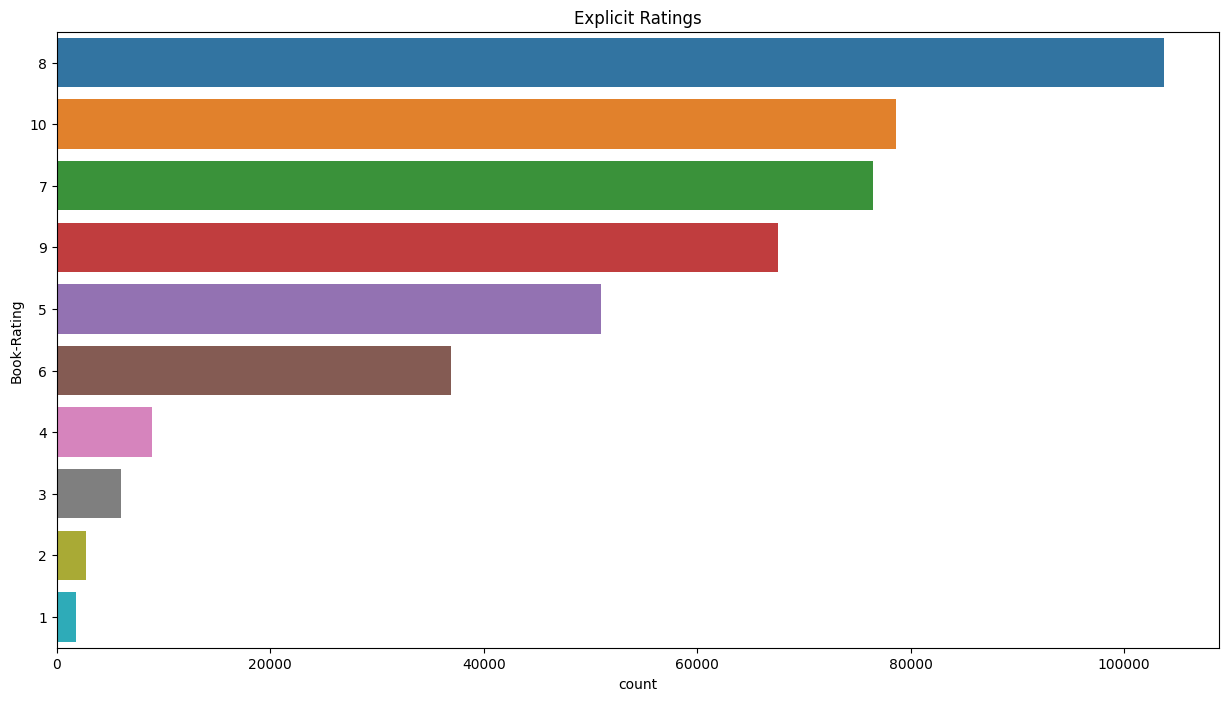

In [60]:
#plotting the explicit ratings
count_plot('Book-Rating', ratings_explicit, 'Explicit Ratings')

It can be observed that higher ratings are most common amongst users and rating 8 has been rated the highest number of times.

In [61]:
#finding the top 5 books that are rated most 
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0679781587,333


In [62]:
#discovering which book is displayed by the above ISBN numbers
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg


In [63]:
# Create column Rating average 
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [64]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.00,1
3,276729,052165615X,3,3.00,1
4,276729,0521795028,6,6.00,1
6,276736,3257224281,8,6.75,4
7,276737,0600570967,6,6.00,1


In [65]:
#Merged_Dataset=users.copy()
#Merged_Dataset=pd.merge(Merged_Dataset,ratings_explicit,on='User-ID')
#Merged_Dataset=pd.merge(Merged_Dataset,books,on='ISBN')

In [66]:
#Merged_Dataset.head()

In [67]:
#mr = DescribeData(Merged_Dataset)
#print(mr.missing)